## 4.4.2.2　サポートベクタマシン

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

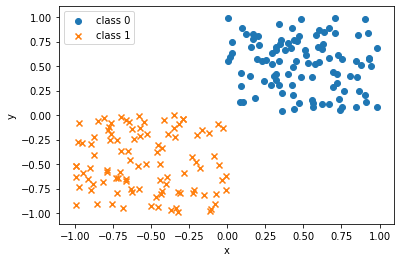

In [10]:
np.random.seed(123)

x0 = np.random.uniform(size = (100, 2))

# repeat は uniformという関数だけをパクっている（中身の引数はパクっていない）
y0 = np.repeat(0, 100)

x1 = np.random.uniform(-1.0, 0.0, size =(100, 2))

y1 = np.repeat(1,100)

fig, ax = plt.subplots()

ax.scatter(x0[:, 0], x0[:, 1], marker = 'o', label = 'class 0')

ax.scatter(x1[:, 0], x1[:, 1], marker = 'x', label = 'class 1')

ax.set_xlabel('x')
ax.set_ylabel('y')

ax.legend()

plt.show()

In [11]:
print(y0[:5])

[0 0 0 0 0]


In [12]:
# 下記のような条件であるとき、svcのプロットを行う「インスタンスの作成」
def plot_boundary_margin_sv(X0, y0, X1, y1, kernel, C, xmin= -1, xmax = 1, ymin = -1, ymax = 1):
    svc = SVC(kernel=kernel, C=C)
    
    # 学習させる
    # =と.を間違える癖がある、気を付けること
    svc.fit(np.vstack((X0, X1)), np.hstack((y0, y1)))
    
    fig, ax = plt.subplots()
    
    # プロットの設定を行う
    ax.scatter(X0[:, 0], X0[:, 1], marker = 'o', label = 'class 0')
    ax.scatter(X1[:, 0], X1[:, 1], marker = 'x', label = 'class 1')
    
    # 決定協会とマージンをプロット
    xx, yy = np.meshgrid(np.linspace(xmin, xmax, 100), np.linspace(ymin, ymax, 100))
    xy = np.vstack([xx.ravel(), yy.ravel()]).T
    p = svc.decision_function(xy).reshape((100, 100))
    ax.contour(xx, yy, p,
               colors='k', levels=[-1, 0, 1],
               alpha=0.5, linestyles=['--', '-', '--'])
    
    # サポートベクタをプロット
    ax.scatter(svc.support_vectors_[:, 0],
               svc.support_vectors_[:, 1],
               s=250, facecolors='none',
              edgecolors='black')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.legend(loc='best')
    plt.show()

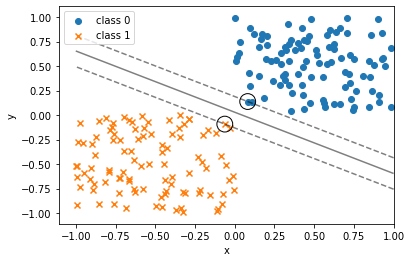

In [15]:
# 実際にプロットしてみる

plot_boundary_margin_sv(x0, y0,x1, y1, kernel='linear', C=1e6)

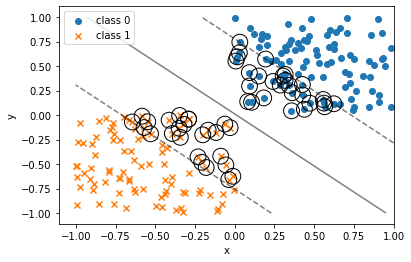

In [17]:
# Cの大きさはマージン大きさを調整する

plot_boundary_margin_sv(x0, y0, x1, y1, kernel = 'linear', C = 0.1)

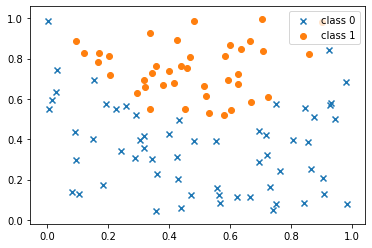

In [18]:
np.random.seed(123)

X = np.random.random(size = (100, 2))

y = (X[:, 1] > 2*(X[:, 0] - 0.5) ** 2 + 0.5).astype(int)

fig, ax = plt.subplots()

ax.scatter(X[y == 0, 0], X[y == 0, 1], marker = 'x', label = 'class 0')
ax.scatter(X[y == 1, 0], X[y == 1, 1], marker = 'o', label = 'class 1')

ax.legend()
plt.show()

In [19]:
X[y == 0, 0]

array([0.69646919, 0.22685145, 0.71946897, 0.9807642 , 0.4809319 ,
       0.43857224, 0.18249173, 0.72244338, 0.36178866, 0.09210494,
       0.43086276, 0.42583029, 0.94416002, 0.62395295, 0.31728548,
       0.86630916, 0.34276383, 0.87545684, 0.84234244, 0.76368284,
       0.19422296, 0.01612921, 0.55678519, 0.15307052, 0.55438325,
       0.92513249, 0.35739757, 0.30476807, 0.15112745, 0.2408559 ,
       0.10590849, 0.84650623, 0.85445249, 0.3167879 , 0.00268806,
       0.90534158, 0.29248941, 0.25754206, 0.80696868, 0.73107304,
       0.98352161, 0.42834727, 0.09332671, 0.92758424, 0.74186215,
       0.28653662, 0.66526147, 0.69631127, 0.565642  , 0.750717  ,
       0.75164399, 0.90987166, 0.08178009, 0.39937871, 0.56221838,
       0.00742638, 0.93193215, 0.02931972, 0.03219793, 0.472913  ])

In [20]:
X[y == 0, 1]

array([0.28613933, 0.55131477, 0.42310646, 0.68482974, 0.39211752,
       0.0596779 , 0.17545176, 0.32295891, 0.22826323, 0.43370117,
       0.4936851 , 0.31226122, 0.50183668, 0.1156184 , 0.41482621,
       0.25045537, 0.30412079, 0.51042234, 0.08319499, 0.24366637,
       0.57245696, 0.59443188, 0.15895964, 0.69552953, 0.38895057,
       0.84167   , 0.04359146, 0.39818568, 0.39887629, 0.34345601,
       0.13089495, 0.55325734, 0.38483781, 0.35426468, 0.98834542,
       0.20763586, 0.52001015, 0.56435904, 0.39437005, 0.16106901,
       0.07936579, 0.20454286, 0.29686078, 0.56900373, 0.04857903,
       0.30646975, 0.11139217, 0.44032788, 0.08490416, 0.57406383,
       0.07914896, 0.1286312 , 0.13841557, 0.42430686, 0.12224355,
       0.55159273, 0.58217546, 0.63590036, 0.74478066, 0.12175436])

In [21]:
X[y == 1, 0]

array([0.34317802, 0.39804426, 0.53155137, 0.63440096, 0.72445532,
       0.29371405, 0.42635131, 0.48303426, 0.51948512, 0.12062867,
       0.60306013, 0.41702221, 0.66931378, 0.6249035 , 0.09571252,
       0.62724897, 0.31876643, 0.70495883, 0.35591487, 0.59317692,
       0.51312815, 0.32198061, 0.17108183, 0.33867085, 0.57855147,
       0.90191137, 0.60069857, 0.45063649, 0.457412  , 0.7086974 ,
       0.16593788, 0.66487245, 0.43821438, 0.58267109, 0.33706638,
       0.85938908, 0.2013995 , 0.46798757, 0.20609573, 0.37898585])

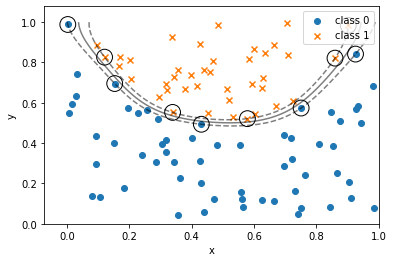

In [22]:
X0, X1 = X[y == 0, :], X[y == 1, :]
y0, y1 = y[y == 0], y[y == 1]
plot_boundary_margin_sv(X0, y0, X1, y1, kernel = 'rbf', C = 1e3, xmin = 0, ymin = 0)